# **Import Libraries and modules**

### Accuracy reached : 99.42
### Epochs : 80
### Convolutions Used : 3x3 and 1x1
### Other things used : Dropout, BatchNormalization, MaxPooling.
### Global Receptive field : Reached till 24x24 Because its not needed to reach 28x28 as we dont have any important information on the corners for this MNIST DATASET.

####For every layers, i have used :
- 3x3 to increase the number of channels to 32
- 1x1 to decrease the number of channesl to 10
- BatchNormalization
- Dropout

## SAVED BEST WEIGHTS AND LOADED THE WEIGHTS FOR CONTINUING THE EPOCHS USING MODEL CHECKPOINTS, CYCLIC LEARNING RATE NOT USED.a

In [0]:
# https://keras.io/
!pip install -q keras
import keras

### EXPLANATION ###

# It is just an library which has the ability to run on top of tensorflow.
# It makes our job easier where we can just need to how should be the flow of architecture, everything else keras will take care if we just calls that method.

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils

from keras.datasets import mnist

### EXPLANATION ###

# Sequential Class imported - We have an method "add" inside this class "Sequential". It helps us to define the model architecture. So for every image, model follows the architecture we 
# defined and generates the results. 

# Flatten Class imported - It is to convert any dimensional array to 1D array. Basically we use it at the end to flatten to the number of categories we have in the dataset.

# Convolution2D Class imported - This is the base class which we call whenever we use filters to convolute over an image. We together pass the strides, activation function, shape when 
# we are passing this Convolution2D as one of the attribute to "add" method.

# np_utils method imported - It helps us to do one-hot encoding for the output variables.

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### EXPLANATION ###

# mnist is one such dataset we can directly download online.
# We have also splitted mnist to training and test dataset like how we use usually use "train_test_split" method.

(60000, 28, 28)


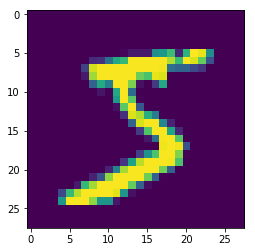

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

### EXPLANATION ###

# We are just looking the diemensions of the image using the "shape" method. It is 28*28.
# Also to view the image, we are using "plt" method.
# We are seeing the first image in the training dataset.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)


### EXPLANATION ###

# We have grayscale image and so we are reshaping all the images to single channel.
# We are reshaping both the training and test set images.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### EXPLANATION ###

# Actually we are normalizing here which is bringing all the values from 0 to 1.
# It is grayscale image and so we have values from 0 to 255, dividing each pixel by 255 gives us the pixels range from 0 to 1.

In [0]:
y_train[:10]

### EXPLANATION ###

# We are just printing output variable y_train values from 0 to 9.

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

### EXPLANATION ###

# Machines is not able to understand when we give 0,1,2,3,.. as the output variables and it will be not able to calculate cost function.
# So we are using one-hot encoding to convert the 1D output variable to matrix.

In [0]:
Y_train[:10]

### EXPLANATION ###

# We are now printing the same 10 output variables in the matrix format.


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation # We have imported Activation function (to bring output total sum to 1) and MaxPooling2D to pass only the shouting pixel.
model = Sequential() # "model" is an object here for "Sequential" Class. It is here helpful for doing our sequential architecture.

 
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1))) # Input Size : 28*28*1 Receptive Field : 3*3 Output Size : 26*26*32
model.add(BatchNormalization(name='norm_1'))
model.add(Convolution2D(10, (1,1), activation='relu',)) # Input Size : 26*26*32 Receptive Field : 3*3 Output Size : 26*26*10
model.add(Dropout(0.25))

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1))) # Input Size : 26*26*10 Receptive Field : 5*5 Output Size : 24*24*32
model.add(BatchNormalization(name='norm_2'))
model.add(Convolution2D(10, (1,1), activation='relu',)) # Input Size : 24*24*32 Receptive Field : 5*5 Output Size : 24*24*10
model.add(Dropout(0.25))

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1))) # Input Size : 24*24*10 Receptive Field : 7*7 Output Size : 22*22*32
model.add(BatchNormalization(name='norm_3'))
model.add(Convolution2D(10, (1,1), activation='relu',)) # Input Size : 22*22*32 Receptive Field : 7*7 Output Size : 22*22*10
model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2,2))) # Input Size : 22*22*10 Receptive Field : 14*14 Output Size : 11*11*10
model.add(Dropout(0.25))

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1))) # Input Size : 11*11*10 Receptive Field : 16*16 Output Size : 9*9*32
model.add(BatchNormalization(name='norm_4'))
model.add(Convolution2D(10, (1,1), activation='relu',)) # Input Size : 9*9*32 Receptive Field : 16*16 Output Size : 9*9*10
model.add(Dropout(0.25))

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1))) # Input Size : 9*9*10 Receptive Field : 18*18 Output Size : 7*7*32
model.add(BatchNormalization(name='norm_5'))
model.add(Convolution2D(10, (1,1), activation='relu',)) # Input Size : 7*7*32 Receptive Field : 18*18 Output Size : 7*7*10
model.add(Dropout(0.25))

model.add(Convolution2D(16, (3, 3), activation='relu', input_shape=(28,28,1))) # Input Size : 7*7*10 Receptive Field : 20*20 Output Size : 5*5*16
model.add(BatchNormalization(name='norm_6'))
model.add(Convolution2D(10, (1,1), activation='relu',)) # Input Size : 5*5*16 Receptive Field : 7*7 Output Size : 5*5*10
model.add(Dropout(0.25))

model.add(Convolution2D(16, (3, 3), activation='relu', input_shape=(28,28,1))) # Input Size : 5*5*10 Receptive Field : 22*22 Output Size : 3*3*16
model.add(BatchNormalization(name='norm_7'))
model.add(Convolution2D(10, (1,1), activation='relu',)) # Input Size : 3*3*16 Receptive Field : 22*22 Output Size : 3*3*10
model.add(Dropout(0.25))

model.add(Convolution2D(16, (3, 3), input_shape=(28,28,1))) # Input Size : 3*3*10 Receptive Field : 24*24 Output Size : 1*1*16
model.add(BatchNormalization(name='norm_8'))
model.add(Convolution2D(10, (1,1))) # Input Size : 1*1*16 Receptive Field : 24*24 Output Size : 1*1*10


model.add(Flatten()) # From 2D Array - 1*1*10 , we are converting it into 1D Array - Just 10 numbers.
model.add(Activation('softmax')) # It will take those 10 numbers and use softmax activation function and make the total count equals to 1.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary() # It will list you how the architecture looks like.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
norm_1 (BatchNormalization)  (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 10)        330       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        2912      
_________________________________________________________________
norm_2 (BatchNormalization)  (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 10)        330       
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## EXPLANATION ###

# We have defined the loss as categorical_crossentropy as we are dealing with 10 categories.
# We are using adam optimizer which does Back propagation and iterate the weights.
# For validating the model, we are considering the accuracy as the parameter.


In [0]:
# For retrieving the saved best results
from google.colab import drive
drive.mount('/content/gdrive')

## EXPLANATION ###

# I have mounted the gdrive to save the best weights and load it again.


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!wget https://raw.githubusercontent.com/bckenstler/CLR/master/clr_callback.py
from clr_callback import *

## EXPLANATION ###

# I have just got raw link of the callback python file.
# I have used model check points and saved the weights.


--2019-05-13 19:07:19--  https://raw.githubusercontent.com/bckenstler/CLR/master/clr_callback.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5326 (5.2K) [text/plain]
Saving to: ‘clr_callback.py.5’

clr_callback.py.5   100%[===================>]   5.20K  --.-KB/s    in 0s      

2019-05-13 19:07:19 (102 MB/s) - ‘clr_callback.py.5’ saved [5326/5326]



In [0]:
# Defining checkpoints
filepath="/content/gdrive/My Drive/Raajesh-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

## EXPLANATION ###

# For saving the best weight.

In [0]:
model.fit(X_train, Y_train, batch_size=32, epochs=40, verbose=1,validation_data=(X_test, Y_test),callbacks=callbacks_list)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 32s 536us/step - loss: 0.9692 - acc: 0.6822 - val_loss: 0.1945 - val_acc: 0.9467

Epoch 00001: val_acc improved from -inf to 0.94670, saving model to /content/gdrive/My Drive/Raajesh-01-0.95.hdf5
Epoch 2/40
60000/60000 [==============================] - 31s 512us/step - loss: 0.2875 - acc: 0.9135 - val_loss: 0.1361 - val_acc: 0.9593

Epoch 00002: val_acc improved from 0.94670 to 0.95930, saving model to /content/gdrive/My Drive/Raajesh-02-0.96.hdf5
Epoch 3/40
60000/60000 [==============================] - 29s 489us/step - loss: 0.2057 - acc: 0.9377 - val_loss: 0.1178 - val_acc: 0.9657

Epoch 00003: val_acc improved from 0.95930 to 0.96570, saving model to /content/gdrive/My Drive/Raajesh-03-0.97.hdf5
Epoch 4/40
60000/60000 [==============================] - 29s 491us/step - loss: 0.1695 - acc: 0.9496 - val_loss: 0.1458 - val_acc: 0.

### Saved the logs for precaution - first 40 epochs, saved the best weight.

WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 32s 536us/step - loss: 0.9692 - acc: 0.6822 - val_loss: 0.1945 - val_acc: 0.9467

Epoch 00001: val_acc improved from -inf to 0.94670, saving model to /content/gdrive/My Drive/Raajesh-01-0.95.hdf5
Epoch 2/40
60000/60000 [==============================] - 31s 512us/step - loss: 0.2875 - acc: 0.9135 - val_loss: 0.1361 - val_acc: 0.9593

Epoch 00002: val_acc improved from 0.94670 to 0.95930, saving model to /content/gdrive/My Drive/Raajesh-02-0.96.hdf5
Epoch 3/40
60000/60000 [==============================] - 29s 489us/step - loss: 0.2057 - acc: 0.9377 - val_loss: 0.1178 - val_acc: 0.9657

Epoch 00003: val_acc improved from 0.95930 to 0.96570, saving model to /content/gdrive/My Drive/Raajesh-03-0.97.hdf5
Epoch 4/40
60000/60000 [==============================] - 29s 491us/step - loss: 0.1695 - acc: 0.9496 - val_loss: 0.1458 - val_acc: 0.9537

Epoch 00004: val_acc did not improve from 0.96570
Epoch 5/40
60000/60000 [==============================] - 31s 522us/step - loss: 0.1528 - acc: 0.9546 - val_loss: 0.0592 - val_acc: 0.9841

Epoch 00005: val_acc improved from 0.96570 to 0.98410, saving model to /content/gdrive/My Drive/Raajesh-05-0.98.hdf5
Epoch 6/40
60000/60000 [==============================] - 29s 489us/step - loss: 0.1364 - acc: 0.9596 - val_loss: 0.0527 - val_acc: 0.9830

Epoch 00006: val_acc did not improve from 0.98410
Epoch 7/40
60000/60000 [==============================] - 31s 512us/step - loss: 0.1319 - acc: 0.9612 - val_loss: 0.0480 - val_acc: 0.9848

Epoch 00007: val_acc improved from 0.98410 to 0.98480, saving model to /content/gdrive/My Drive/Raajesh-07-0.98.hdf5
Epoch 8/40
60000/60000 [==============================] - 29s 490us/step - loss: 0.1262 - acc: 0.9631 - val_loss: 0.0458 - val_acc: 0.9858

Epoch 00008: val_acc improved from 0.98480 to 0.98580, saving model to /content/gdrive/My Drive/Raajesh-08-0.99.hdf5
Epoch 9/40
60000/60000 [==============================] - 29s 488us/step - loss: 0.1154 - acc: 0.9661 - val_loss: 0.0477 - val_acc: 0.9861

Epoch 00009: val_acc improved from 0.98580 to 0.98610, saving model to /content/gdrive/My Drive/Raajesh-09-0.99.hdf5
Epoch 10/40
60000/60000 [==============================] - 32s 530us/step - loss: 0.1134 - acc: 0.9664 - val_loss: 0.0439 - val_acc: 0.9861

Epoch 00010: val_acc did not improve from 0.98610
Epoch 11/40
60000/60000 [==============================] - 29s 489us/step - loss: 0.1032 - acc: 0.9693 - val_loss: 0.0439 - val_acc: 0.9868

Epoch 00011: val_acc improved from 0.98610 to 0.98680, saving model to /content/gdrive/My Drive/Raajesh-11-0.99.hdf5
Epoch 12/40
60000/60000 [==============================] - 30s 494us/step - loss: 0.1032 - acc: 0.9697 - val_loss: 0.0414 - val_acc: 0.9870

Epoch 00012: val_acc improved from 0.98680 to 0.98700, saving model to /content/gdrive/My Drive/Raajesh-12-0.99.hdf5
Epoch 13/40
60000/60000 [==============================] - 30s 504us/step - loss: 0.1035 - acc: 0.9705 - val_loss: 0.0397 - val_acc: 0.9885

Epoch 00013: val_acc improved from 0.98700 to 0.98850, saving model to /content/gdrive/My Drive/Raajesh-13-0.99.hdf5
Epoch 14/40
60000/60000 [==============================] - 29s 487us/step - loss: 0.0999 - acc: 0.9707 - val_loss: 0.0387 - val_acc: 0.9891

Epoch 00014: val_acc improved from 0.98850 to 0.98910, saving model to /content/gdrive/My Drive/Raajesh-14-0.99.hdf5
Epoch 15/40
60000/60000 [==============================] - 31s 522us/step - loss: 0.0960 - acc: 0.9725 - val_loss: 0.0390 - val_acc: 0.9878

Epoch 00015: val_acc did not improve from 0.98910
Epoch 16/40
60000/60000 [==============================] - 29s 488us/step - loss: 0.0958 - acc: 0.9720 - val_loss: 0.0344 - val_acc: 0.9902

Epoch 00016: val_acc improved from 0.98910 to 0.99020, saving model to /content/gdrive/My Drive/Raajesh-16-0.99.hdf5
Epoch 17/40
60000/60000 [==============================] - 29s 487us/step - loss: 0.0942 - acc: 0.9730 - val_loss: 0.0364 - val_acc: 0.9892

Epoch 00017: val_acc did not improve from 0.99020
Epoch 18/40
60000/60000 [==============================] - 31s 508us/step - loss: 0.0890 - acc: 0.9732 - val_loss: 0.0325 - val_acc: 0.9893

Epoch 00018: val_acc did not improve from 0.99020
Epoch 19/40
60000/60000 [==============================] - 32s 536us/step - loss: 0.0894 - acc: 0.9746 - val_loss: 0.0338 - val_acc: 0.9893

Epoch 00019: val_acc did not improve from 0.99020
Epoch 20/40
60000/60000 [==============================] - 32s 541us/step - loss: 0.0891 - acc: 0.9740 - val_loss: 0.0396 - val_acc: 0.9884

Epoch 00020: val_acc did not improve from 0.99020
Epoch 21/40
60000/60000 [==============================] - 30s 501us/step - loss: 0.0840 - acc: 0.9752 - val_loss: 0.0366 - val_acc: 0.9882

Epoch 00021: val_acc did not improve from 0.99020
Epoch 22/40
60000/60000 [==============================] - 30s 493us/step - loss: 0.0856 - acc: 0.9750 - val_loss: 0.0380 - val_acc: 0.9878

Epoch 00022: val_acc did not improve from 0.99020
Epoch 23/40
60000/60000 [==============================] - 31s 517us/step - loss: 0.0817 - acc: 0.9762 - val_loss: 0.0275 - val_acc: 0.9912

Epoch 00023: val_acc improved from 0.99020 to 0.99120, saving model to /content/gdrive/My Drive/Raajesh-23-0.99.hdf5
Epoch 24/40
60000/60000 [==============================] - 30s 494us/step - loss: 0.0816 - acc: 0.9756 - val_loss: 0.0292 - val_acc: 0.9915

Epoch 00024: val_acc improved from 0.99120 to 0.99150, saving model to /content/gdrive/My Drive/Raajesh-24-0.99.hdf5
Epoch 25/40
60000/60000 [==============================] - 30s 507us/step - loss: 0.0810 - acc: 0.9756 - val_loss: 0.0275 - val_acc: 0.9912

Epoch 00025: val_acc did not improve from 0.99150
Epoch 26/40
60000/60000 [==============================] - 31s 517us/step - loss: 0.0789 - acc: 0.9767 - val_loss: 0.0276 - val_acc: 0.9915

Epoch 00026: val_acc did not improve from 0.99150
Epoch 27/40
60000/60000 [==============================] - 30s 494us/step - loss: 0.0807 - acc: 0.9771 - val_loss: 0.0293 - val_acc: 0.9915

Epoch 00027: val_acc did not improve from 0.99150
Epoch 28/40
60000/60000 [==============================] - 31s 515us/step - loss: 0.0791 - acc: 0.9770 - val_loss: 0.0326 - val_acc: 0.9892

Epoch 00028: val_acc did not improve from 0.99150
Epoch 29/40
60000/60000 [==============================] - 30s 496us/step - loss: 0.0773 - acc: 0.9776 - val_loss: 0.0293 - val_acc: 0.9906

Epoch 00029: val_acc did not improve from 0.99150
Epoch 30/40
60000/60000 [==============================] - 31s 522us/step - loss: 0.0763 - acc: 0.9772 - val_loss: 0.0340 - val_acc: 0.9905

Epoch 00030: val_acc did not improve from 0.99150
Epoch 31/40
60000/60000 [==============================] - 31s 518us/step - loss: 0.0774 - acc: 0.9773 - val_loss: 0.0272 - val_acc: 0.9911

Epoch 00031: val_acc did not improve from 0.99150
Epoch 32/40
60000/60000 [==============================] - 30s 492us/step - loss: 0.0752 - acc: 0.9776 - val_loss: 0.0280 - val_acc: 0.9918

Epoch 00032: val_acc improved from 0.99150 to 0.99180, saving model to /content/gdrive/My Drive/Raajesh-32-0.99.hdf5
Epoch 33/40
60000/60000 [==============================] - 30s 494us/step - loss: 0.0764 - acc: 0.9775 - val_loss: 0.0287 - val_acc: 0.9908

Epoch 00033: val_acc did not improve from 0.99180
Epoch 34/40
60000/60000 [==============================] - 31s 517us/step - loss: 0.0739 - acc: 0.9779 - val_loss: 0.0287 - val_acc: 0.9909

Epoch 00034: val_acc did not improve from 0.99180
Epoch 35/40
60000/60000 [==============================] - 30s 505us/step - loss: 0.0709 - acc: 0.9795 - val_loss: 0.0292 - val_acc: 0.9912

Epoch 00035: val_acc did not improve from 0.99180
Epoch 36/40
60000/60000 [==============================] - 31s 520us/step - loss: 0.0740 - acc: 0.9788 - val_loss: 0.0268 - val_acc: 0.9915

Epoch 00036: val_acc did not improve from 0.99180
Epoch 37/40
60000/60000 [==============================] - 30s 492us/step - loss: 0.0728 - acc: 0.9783 - val_loss: 0.0313 - val_acc: 0.9903

Epoch 00037: val_acc did not improve from 0.99180
Epoch 38/40
60000/60000 [==============================] - 30s 494us/step - loss: 0.0715 - acc: 0.9795 - val_loss: 0.0259 - val_acc: 0.9914

Epoch 00038: val_acc did not improve from 0.99180
Epoch 39/40
60000/60000 [==============================] - 31s 517us/step - loss: 0.0709 - acc: 0.9794 - val_loss: 0.0239 - val_acc: 0.9927

Epoch 00039: val_acc improved from 0.99180 to 0.99270, saving model to /content/gdrive/My Drive/Raajesh-39-0.99.hdf5
Epoch 40/40
60000/60000 [==============================] - 31s 522us/step - loss: 0.0713 - acc: 0.9793 - val_loss: 0.0231 - val_acc: 0.9925

In [0]:
model.fit(X_train, Y_train, batch_size=32, epochs=40, verbose=1,validation_data=(X_test, Y_test),callbacks=callbacks_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 32s 532us/step - loss: 0.0714 - acc: 0.9781 - val_loss: 0.0260 - val_acc: 0.9921

Epoch 00001: val_acc did not improve from 0.99270
Epoch 2/40
60000/60000 [==============================] - 29s 490us/step - loss: 0.0681 - acc: 0.9803 - val_loss: 0.0263 - val_acc: 0.9924

Epoch 00002: val_acc did not improve from 0.99270
Epoch 3/40
60000/60000 [==============================] - 31s 513us/step - loss: 0.0700 - acc: 0.9794 - val_loss: 0.0274 - val_acc: 0.9916

Epoch 00003: val_acc did not improve from 0.99270
Epoch 4/40
60000/60000 [==============================] - 29s 489us/step - loss: 0.0658 - acc: 0.9807 - val_loss: 0.0249 - val_acc: 0.9925

Epoch 00004: val_acc did not improve from 0.99270
Epoch 5/40
60000/60000 [==============================] - 30s 507us/step - loss: 0.0684 - acc: 0.9801 - val_loss: 0.0259 - val_acc: 0.9920

Epoch 00005: val_acc did not improve from 0.99270


### Saved the logs for precaution - next 40 epochs.

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 32s 532us/step - loss: 0.0714 - acc: 0.9781 - val_loss: 0.0260 - val_acc: 0.9921

Epoch 00001: val_acc did not improve from 0.99270
Epoch 2/40
60000/60000 [==============================] - 29s 490us/step - loss: 0.0681 - acc: 0.9803 - val_loss: 0.0263 - val_acc: 0.9924

Epoch 00002: val_acc did not improve from 0.99270
Epoch 3/40
60000/60000 [==============================] - 31s 513us/step - loss: 0.0700 - acc: 0.9794 - val_loss: 0.0274 - val_acc: 0.9916

Epoch 00003: val_acc did not improve from 0.99270
Epoch 4/40
60000/60000 [==============================] - 29s 489us/step - loss: 0.0658 - acc: 0.9807 - val_loss: 0.0249 - val_acc: 0.9925

Epoch 00004: val_acc did not improve from 0.99270
Epoch 5/40
60000/60000 [==============================] - 30s 507us/step - loss: 0.0684 - acc: 0.9801 - val_loss: 0.0259 - val_acc: 0.9920

Epoch 00005: val_acc did not improve from 0.99270
Epoch 6/40
60000/60000 [==============================] - 32s 535us/step - loss: 0.0695 - acc: 0.9797 - val_loss: 0.0278 - val_acc: 0.9912

Epoch 00006: val_acc did not improve from 0.99270
Epoch 7/40
60000/60000 [==============================] - 31s 511us/step - loss: 0.0667 - acc: 0.9804 - val_loss: 0.0237 - val_acc: 0.9925

Epoch 00007: val_acc did not improve from 0.99270
Epoch 8/40
60000/60000 [==============================] - 32s 528us/step - loss: 0.0670 - acc: 0.9808 - val_loss: 0.0253 - val_acc: 0.9922

Epoch 00008: val_acc did not improve from 0.99270
Epoch 9/40
60000/60000 [==============================] - 30s 507us/step - loss: 0.0686 - acc: 0.9799 - val_loss: 0.0269 - val_acc: 0.9913

Epoch 00009: val_acc did not improve from 0.99270
Epoch 10/40
60000/60000 [==============================] - 30s 502us/step - loss: 0.0654 - acc: 0.9806 - val_loss: 0.0250 - val_acc: 0.9921

Epoch 00010: val_acc did not improve from 0.99270
Epoch 11/40
60000/60000 [==============================] - 32s 538us/step - loss: 0.0651 - acc: 0.9806 - val_loss: 0.0302 - val_acc: 0.9912

Epoch 00011: val_acc did not improve from 0.99270
Epoch 12/40
60000/60000 [==============================] - 30s 498us/step - loss: 0.0657 - acc: 0.9808 - val_loss: 0.0251 - val_acc: 0.9927

Epoch 00012: val_acc did not improve from 0.99270
Epoch 13/40
60000/60000 [==============================] - 31s 513us/step - loss: 0.0641 - acc: 0.9815 - val_loss: 0.0233 - val_acc: 0.9929

Epoch 00013: val_acc improved from 0.99270 to 0.99290, saving model to /content/gdrive/My Drive/Raajesh-13-0.99.hdf5
Epoch 14/40
60000/60000 [==============================] - 29s 490us/step - loss: 0.0654 - acc: 0.9810 - val_loss: 0.0243 - val_acc: 0.9923

Epoch 00014: val_acc did not improve from 0.99290
Epoch 15/40
60000/60000 [==============================] - 29s 491us/step - loss: 0.0640 - acc: 0.9810 - val_loss: 0.0251 - val_acc: 0.9918

Epoch 00015: val_acc did not improve from 0.99290
Epoch 16/40
60000/60000 [==============================] - 32s 528us/step - loss: 0.0639 - acc: 0.9814 - val_loss: 0.0235 - val_acc: 0.9931

Epoch 00016: val_acc improved from 0.99290 to 0.99310, saving model to /content/gdrive/My Drive/Raajesh-16-0.99.hdf5
Epoch 17/40
60000/60000 [==============================] - 30s 504us/step - loss: 0.0627 - acc: 0.9811 - val_loss: 0.0228 - val_acc: 0.9929

Epoch 00017: val_acc did not improve from 0.99310
Epoch 18/40
60000/60000 [==============================] - 30s 498us/step - loss: 0.0633 - acc: 0.9811 - val_loss: 0.0262 - val_acc: 0.9912

Epoch 00018: val_acc did not improve from 0.99310
Epoch 19/40
60000/60000 [==============================] - 30s 506us/step - loss: 0.0620 - acc: 0.9812 - val_loss: 0.0229 - val_acc: 0.9928

Epoch 00019: val_acc did not improve from 0.99310
Epoch 20/40
60000/60000 [==============================] - 30s 492us/step - loss: 0.0649 - acc: 0.9809 - val_loss: 0.0209 - val_acc: 0.9934

Epoch 00020: val_acc improved from 0.99310 to 0.99340, saving model to /content/gdrive/My Drive/Raajesh-20-0.99.hdf5
Epoch 21/40
60000/60000 [==============================] - 31s 522us/step - loss: 0.0650 - acc: 0.9811 - val_loss: 0.0254 - val_acc: 0.9924

Epoch 00021: val_acc did not improve from 0.99340
Epoch 22/40
60000/60000 [==============================] - 29s 490us/step - loss: 0.0627 - acc: 0.9808 - val_loss: 0.0211 - val_acc: 0.9929

Epoch 00022: val_acc did not improve from 0.99340
Epoch 23/40
60000/60000 [==============================] - 29s 491us/step - loss: 0.0605 - acc: 0.9823 - val_loss: 0.0226 - val_acc: 0.9927

Epoch 00023: val_acc did not improve from 0.99340
Epoch 24/40
60000/60000 [==============================] - 31s 514us/step - loss: 0.0612 - acc: 0.9819 - val_loss: 0.0238 - val_acc: 0.9925

Epoch 00024: val_acc did not improve from 0.99340
Epoch 25/40
60000/60000 [==============================] - 29s 490us/step - loss: 0.0623 - acc: 0.9818 - val_loss: 0.0224 - val_acc: 0.9922

Epoch 00025: val_acc did not improve from 0.99340
Epoch 26/40
60000/60000 [==============================] - 30s 496us/step - loss: 0.0593 - acc: 0.9828 - val_loss: 0.0218 - val_acc: 0.9928

Epoch 00026: val_acc did not improve from 0.99340
Epoch 27/40
60000/60000 [==============================] - 32s 530us/step - loss: 0.0605 - acc: 0.9817 - val_loss: 0.0231 - val_acc: 0.9933

Epoch 00027: val_acc did not improve from 0.99340
Epoch 28/40
60000/60000 [==============================] - 29s 491us/step - loss: 0.0596 - acc: 0.9827 - val_loss: 0.0235 - val_acc: 0.9934

Epoch 00028: val_acc did not improve from 0.99340
Epoch 29/40
60000/60000 [==============================] - 31s 514us/step - loss: 0.0590 - acc: 0.9828 - val_loss: 0.0238 - val_acc: 0.9927

Epoch 00029: val_acc did not improve from 0.99340
Epoch 30/40
60000/60000 [==============================] - 29s 491us/step - loss: 0.0616 - acc: 0.9822 - val_loss: 0.0202 - val_acc: 0.9935

Epoch 00030: val_acc improved from 0.99340 to 0.99350, saving model to /content/gdrive/My Drive/Raajesh-30-0.99.hdf5
Epoch 31/40
60000/60000 [==============================] - 30s 496us/step - loss: 0.0599 - acc: 0.9823 - val_loss: 0.0272 - val_acc: 0.9921

Epoch 00031: val_acc did not improve from 0.99350
Epoch 32/40
60000/60000 [==============================] - 31s 522us/step - loss: 0.0637 - acc: 0.9816 - val_loss: 0.0215 - val_acc: 0.9927

Epoch 00032: val_acc did not improve from 0.99350
Epoch 33/40
60000/60000 [==============================] - 29s 491us/step - loss: 0.0601 - acc: 0.9826 - val_loss: 0.0221 - val_acc: 0.9937

Epoch 00033: val_acc improved from 0.99350 to 0.99370, saving model to /content/gdrive/My Drive/Raajesh-33-0.99.hdf5
Epoch 34/40
60000/60000 [==============================] - 30s 500us/step - loss: 0.0610 - acc: 0.9824 - val_loss: 0.0223 - val_acc: 0.9931

Epoch 00034: val_acc did not improve from 0.99370
Epoch 35/40
60000/60000 [==============================] - 30s 504us/step - loss: 0.0577 - acc: 0.9830 - val_loss: 0.0228 - val_acc: 0.9933

Epoch 00035: val_acc did not improve from 0.99370
Epoch 36/40
60000/60000 [==============================] - 29s 490us/step - loss: 0.0582 - acc: 0.9828 - val_loss: 0.0198 - val_acc: 0.9942

Epoch 00036: val_acc improved from 0.99370 to 0.99420, saving model to /content/gdrive/My Drive/Raajesh-36-0.99.hdf5
Epoch 37/40
60000/60000 [==============================] - 32s 528us/step - loss: 0.0564 - acc: 0.9828 - val_loss: 0.0236 - val_acc: 0.9925

Epoch 00037: val_acc did not improve from 0.99420
Epoch 38/40
60000/60000 [==============================] - 29s 491us/step - loss: 0.0550 - acc: 0.9836 - val_loss: 0.0248 - val_acc: 0.9925

Epoch 00038: val_acc did not improve from 0.99420
Epoch 39/40
60000/60000 [==============================] - 29s 491us/step - loss: 0.0561 - acc: 0.9833 - val_loss: 0.0235 - val_acc: 0.9933

Epoch 00039: val_acc did not improve from 0.99420
Epoch 40/40
60000/60000 [==============================] - 31s 512us/step - loss: 0.0596 - acc: 0.9828 - val_loss: 0.0235 - val_acc: 0.9920

Epoch 00040: val_acc did not improve from 0.99420
<keras.callbacks.History at 0x7f9c38433c88>

In [0]:
model.load_weights('/content/gdrive/My Drive/Raajesh-39-0.99.hdf5')

In [0]:
model.load_weights('/content/gdrive/My Drive/Raajesh-36-0.99.hdf5')

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.019791167299274822, 0.9942]


### LOADED THE BEST WEIGHT AND PRINTED THE SCORE, REACHED 99.4


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.07551665e-08 1.84672345e-07 9.35736534e-06 9.81743824e-08
  1.54703102e-05 1.47401225e-09 4.26876850e-13 9.99973178e-01
  1.51583013e-09 1.67354119e-06]
 [5.19555442e-06 6.07622605e-05 9.99829531e-01 2.78964052e-07
  4.03079030e-05 8.07417962e-07 6.19759958e-05 1.06870921e-07
  1.04255025e-06 2.15776708e-09]
 [5.80054804e-09 9.99995708e-01 2.51074876e-08 4.34101821e-07
  3.37986307e-07 1.04865601e-08 2.13473076e-11 3.31049637e-06
  1.19231727e-08 5.41704068e-08]
 [9.99870539e-01 2.83346413e-08 1.91630579e-06 3.59786867e-07
  1.46868501e-07 1.21712874e-05 6.93881811e-05 1.01091484e-06
  1.73079152e-05 2.71588397e-05]
 [6.06486935e-07 1.39690092e-05 2.35127100e-08 9.94981333e-13
  9.99952912e-01 1.15219362e-10 6.74265902e-06 7.37303694e-08
  7.40501171e-09 2.57304564e-05]
 [1.01777156e-08 9.99995708e-01 1.14607408e-08 9.35500495e-08
  6.30814952e-07 4.42583881e-09 2.21943835e-11 3.38814607e-06
  2.94390623e-09 6.97111702e-08]
 [2.79377091e-05 1.67931139e-03 7.51635241e-07 6.68135783e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()